# <u>Partie 1.2:</u> Visualisation des données

<b><u>Auteurs</u> :</b> Eytan Levy, Guillaume Surleau et Manitas Bahri  
<b><u>Date</u> :</b> Mars 2023

In [108]:
# Librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Définit le chemin du répertoire parent
import sys
sys.path.append("../")

# Custom packages
from py_scripts import pre_processing as pp
from py_scripts.utils import *


In [109]:
# Pour afficher toutes les collones et lignes de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [110]:
# Charge la base de donnée
DATASET, _, _ = pp.load_preproc_dataset(ratio_test=0, rescaled=False)


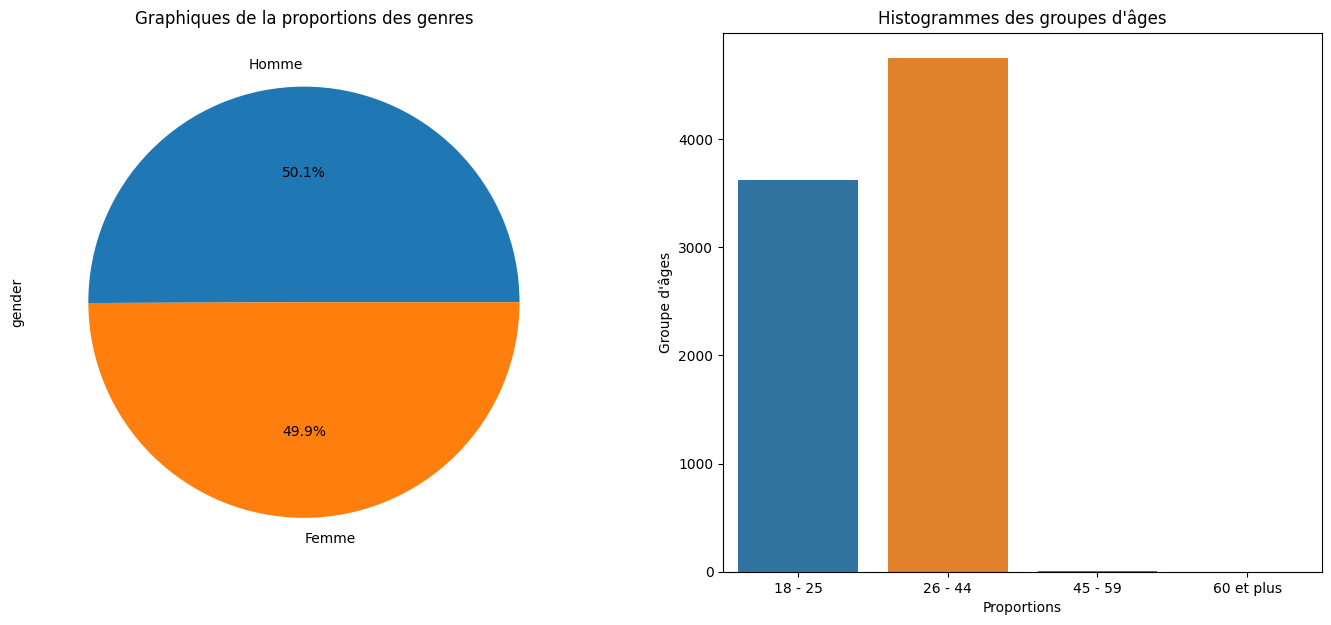

In [111]:
plt.figure(figsize=(17, 7))
args = {"kind": "pie", "autopct": "%.1f%%"}

# Proportion des genres.
plt.subplot(121)
plt.title("Graphiques de la proportions des genres")
lbl_gender = ["Homme", "Femme"]
DATASET["gender"].value_counts().plot(**args, labels=lbl_gender)

# Proportion des âges.
g1 = DATASET[(DATASET["age"] >= 18) & (DATASET["age"] <= 25)]
g2 = DATASET[(DATASET["age"] >= 26) & (DATASET["age"] <= 44)]
g3 = DATASET[(DATASET["age"] >= 45) & (DATASET["age"] <= 59)]
g4 = DATASET[(DATASET["age"] >= 60)]

groups_age = {"18 - 25": len(g1), "26 - 44": len(g2),
              "45 - 59": len(g3), "60 et plus": len(g4)}

plt.subplot(122)
sns.barplot(x=list(groups_age.keys()), y=list(groups_age.values()))
plt.xlabel("Proportions")
plt.ylabel("Groupe d'âges")
plt.title("Histogrammes des groupes d'âges")

plt.show()


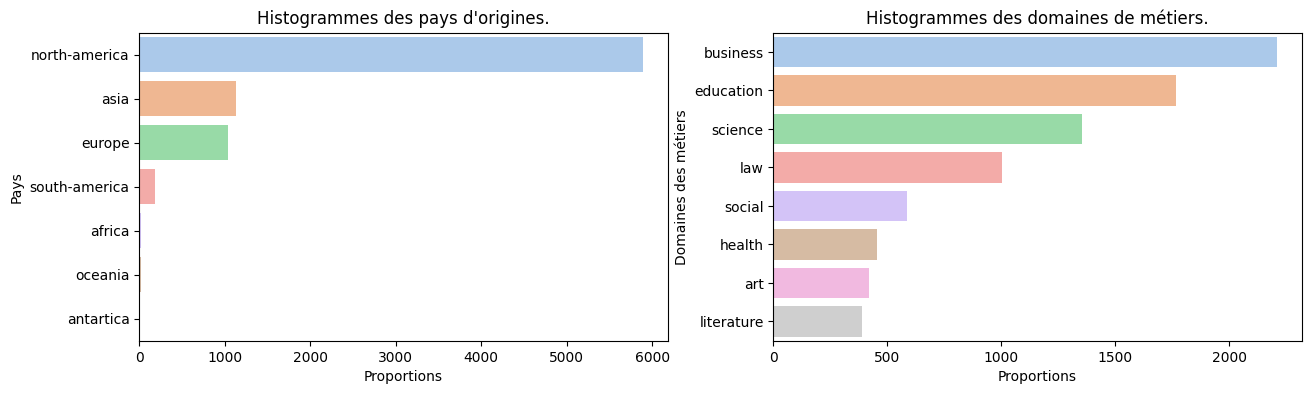

In [112]:
lbl_from, val_from = count_multiple_columns(DATASET, "from_")
lbl_career, val_career = count_multiple_columns(DATASET, "career_")

plt.figure(figsize=(15, 4))

# Graphique des pays
plt.subplot(121)
sns.barplot(x=lbl_from, y=val_from, palette="pastel")
plt.xlabel("Proportions")
plt.ylabel("Pays")
plt.title("Histogrammes des pays d'origines.")

# Graphique des personnes
plt.subplot(122)
sns.barplot(x=lbl_career, y=val_career, palette="pastel")
plt.xlabel("Proportions")
plt.ylabel("Domaines des métiers")
plt.title("Histogrammes des domaines de métiers.")
plt.show()


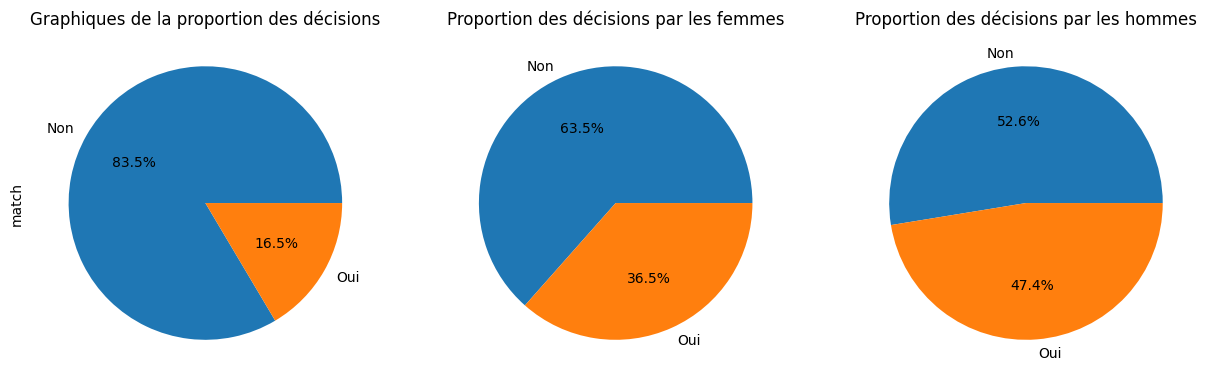

In [113]:
decision = DATASET.groupby("gender")["decision"].value_counts()
woman_decision, man_decision = decision[0], decision[1]
lbl_yesno = ["Non", "Oui"]

plt.figure(figsize=(15, 7))

# Proportion de match
plt.subplot(131)
plt.title("Graphiques de la proportion des décisions")
DATASET["match"].value_counts().plot(**args, labels=lbl_yesno)

plt.subplot(132)
plt.pie(x=woman_decision, labels=lbl_yesno, autopct="%.1f%%")
plt.title("Proportion des décisions par les femmes")

plt.subplot(133)
plt.pie(x=man_decision, labels=lbl_yesno, autopct="%.1f%%")
plt.title("Proportion des décisions par les hommes")

plt.show()


In [114]:
DATASET.drop(columns=["p_decision", "decision"], inplace=True)


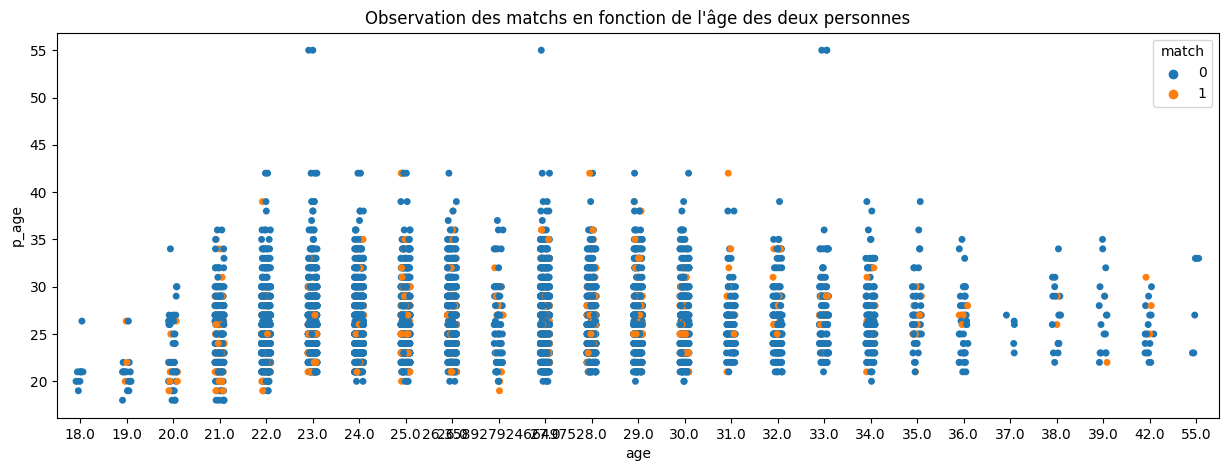

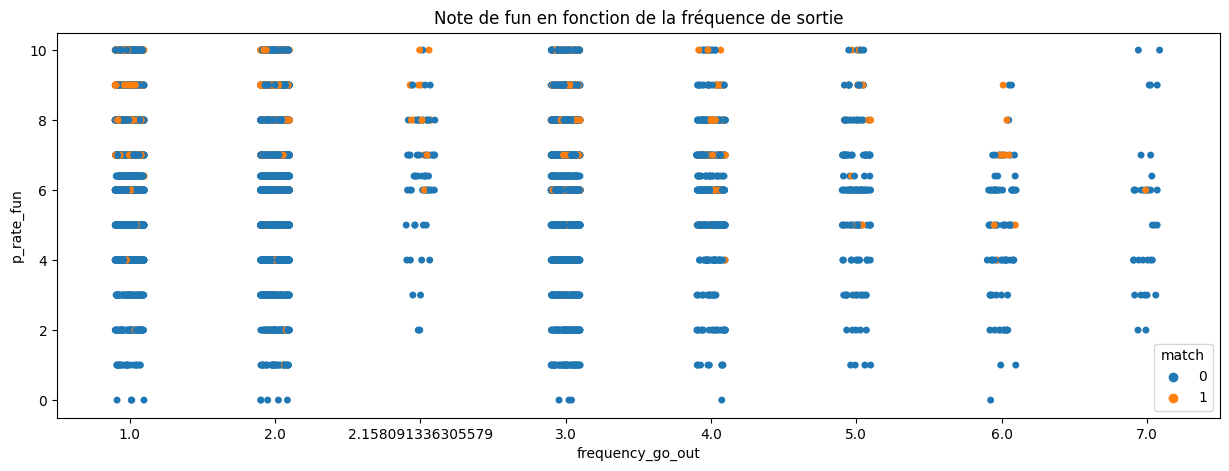

In [156]:
# Figure 1
fig, ax1 = plt.subplots(figsize=(15, 5))
sns.stripplot(data=DATASET, x="age", y="p_age",hue='match', ax=ax1)
ax1.set_title("Observation des matchs en fonction de l'âge des deux personnes")

# Figure 2
fig, ax2 = plt.subplots(figsize=(15, 5))
sns.stripplot(data=DATASET, x="frequency_go_out", y="p_rate_fun",hue='match', ax=ax2)
ax2.set_title("Note de fun en fonction de la fréquence de sortie")

plt.show()

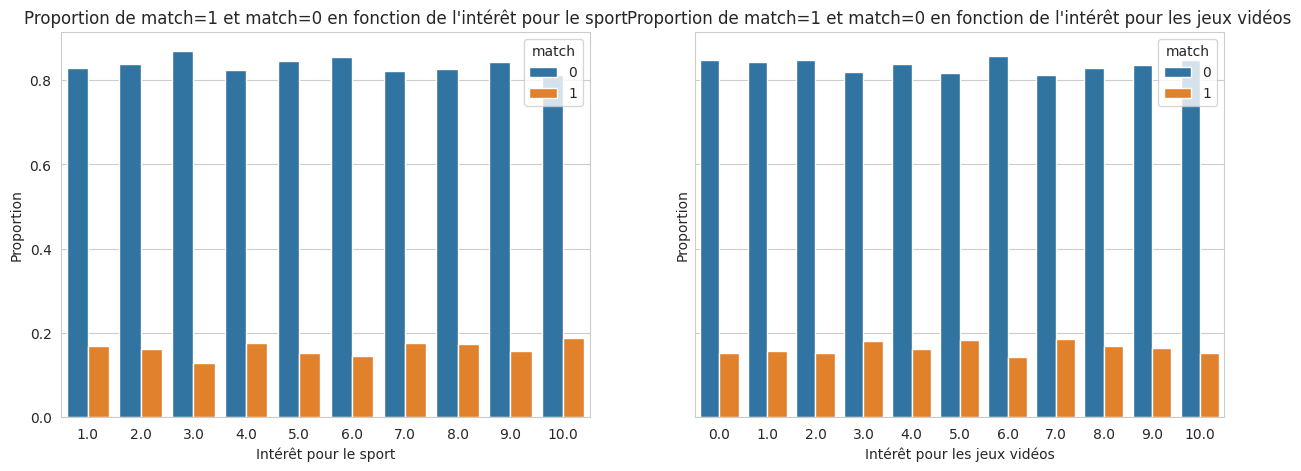

In [164]:
# Création d'une nouvelle colonne pour chaque variable avec le niveau d'intérêt arrondi à l'entier le plus proche
DATASET["interest_sports_rounded"] = DATASET["sports"].round()
DATASET["interest_gaming_rounded"] = DATASET["interest_gaming"].round()

# Calcul des proportions de match=1 et match=0 pour chaque niveau d'intérêt arrondi
interest_counts = DATASET.groupby(["interest_sports_rounded", "match"]).size().reset_index(name="count")
interest_counts["proportion"] = interest_counts["count"] / interest_counts.groupby("interest_sports_rounded")["count"].transform("sum")

gaming_counts = DATASET.groupby(["interest_gaming_rounded", "match"]).size().reset_index(name="count")
gaming_counts["proportion"] = gaming_counts["count"] / gaming_counts.groupby("interest_gaming_rounded")["count"].transform("sum")

# Affichage en graphique en barres empilées
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.barplot(data=interest_counts, x="interest_sports_rounded", y="proportion", hue="match", ax=ax1)
ax1.set_xlabel("Intérêt pour le sport")
ax1.set_ylabel("Proportion")
ax1.set_title("Proportion de match=1 et match=0 en fonction de l'intérêt pour le sport")

sns.barplot(data=gaming_counts, x="interest_gaming_rounded", y="proportion", hue="match", ax=ax2)
ax2.set_xlabel("Intérêt pour les jeux vidéos")
ax2.set_ylabel("Proportion")
ax2.set_title("Proportion de match=1 et match=0 en fonction de l'intérêt pour les jeux vidéos")

plt.show()

Text(0.5, 1.0, 'Observation of the matching rate according to careers')

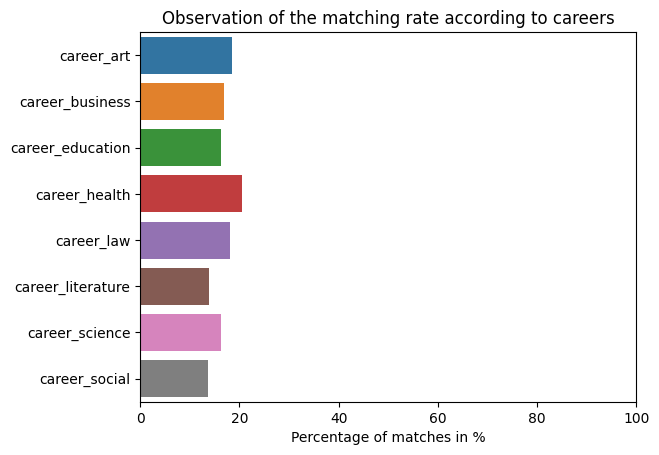

In [117]:
careers = ['career_art', 'career_business', 'career_education', 'career_health',
           'career_law', 'career_literature', 'career_science', 'career_social']

# Dictionnaire pour stocker les ratios de match pour chaque carrière
ratios = {}

# Calculer les ratios de match pour chaque carrière
for career in careers:
    df_career = DATASET[DATASET[career] == 1]
    ratio = np.sum(df_career['match'] == 1) * 100 / len(df_career)
    ratios[career] = ratio

# Afficher les résultats
ratios = list(ratios.values())
careers = ['career_art','career_business','career_education','career_health','career_law','career_literature','career_science','career_social']
sns.barplot(x=ratios, y=careers)
plt.xlim(0,100)
plt.xlabel("Percentage of matches in %")
plt.title("Observation of the matching rate according to careers")

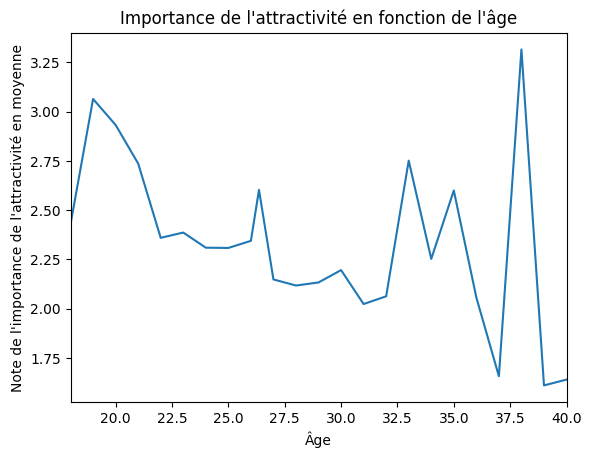

In [118]:
# Calculer la moyenne de exp_relation pour chaque âge
age_exp_relation = DATASET.groupby('age')['p_important_attractive'].mean()

# Créer un graphique linéaire
fig, ax = plt.subplots()
ax.plot(age_exp_relation.index, age_exp_relation.values)
ax.set_xlabel('Âge')
ax.set_ylabel('Note de l\'importance de l\'attractivité en moyenne')
ax.set_title('Importance de l\'attractivité en fonction de l\'âge')
ax.set_xlim(18,40)

plt.show()

In [119]:
DATASET.head()

,id_individual,gender,id_group,p_id,match,interrest_correlation,samerace,p_age,p_race,p_important_attractive,p_important_sinsere,p_important_intelligence,p_important_fun,p_important_ambitious,p_important_shared_interests,p_rate_attractive,p_rate_sincere,p_rate_intelligence,p_rate_fun,p_rate_ambitious,p_rate_shared_interests,p_rate_like,p_rate_prob_like,age,world,world_pref,imprelig,exp_relation,frequency_go_out,sports,interest_tvsports,interest_exercise,interest_dining,interest_museums,interest_art,interest_hiking,interest_gaming,interest_clubbing,interest_reading,interest_tv,interest_theater,interest_movies,interest_concerts,interest_music,interest_shopping,interest_yoga,exphappy,rate_self_attractive,rate_self_sincere,rate_self_intelligence,rate_self_fun,rate_self_ambitious,rate_self_shared_interests,rate_self_like,rate_prob_like,number_match,work_field_art,work_field_business,work_field_education,work_field_health,work_field_law,work_field_literature,work_field_science,work_field_social,career_art,career_business,career_education,career_health,career_law,career_literature,career_science,career_social,from_north-america,from_south-america,from_europe,from_africa,from_asia,from_oceania,from_antartica
0,1,0,1,11.0,0,0.14,0,27.0,2.0,4.0,2.0,2.0,2.0,0.0,0.0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,21.0,4.0,2.0,4.0,2.0,1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.000000,4.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,1,0,1,12.0,0,0.54,0,22.0,2.0,6.0,0.0,0.0,4.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,21.0,4.0,2.0,4.0,2.0,1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.000000,4.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,1,0,1,13.0,1,0.16,1,22.0,4.0,2.0,2.0,2.0,2.0,1.0,1.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,21.0,4.0,2.0,4.0,2.0,1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,5.0,8.0,9.0,8.0,5.0,7.0,7.0,5.207213,4.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,1,0,1,14.0,1,0.61,0,23.0,2.0,3.0,0.0,2.0,4.0,0.0,0.0,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,21.0,4.0,2.0,4.0,2.0,1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.000000,4.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,1,0,1,15.0,1,0.21,0,24.0,3.0,3.0,1.0,2.0,1.0,1.0,2.0,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,21.0,4.0,2.0,4.0,2.0,1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.000000,4.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
